# Single Linear Regression - Ejemplo - Precio de Celulares

**Contexto**  
Este conjunto de datos contiene el precio de celulares, de acuerdo diversos factores.

**Contenido**  
El conjunto de datos proviene de kaggle: [Mobile Price Prediction](https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction).  
Contiene 161 renglones, con las siguientes columnas:
* Product_id: identificador del celular
* **Price**: precio en USD **-> variable objetivo**
* Sale: número de ticket
* weight: peso
* resolution: resolución
* ppi: densidad en pixeles
* cpu core: número de núcleos de cpu
* cpu freq: frecuencia del cpu
* internal mem: memoria interna en GB
* ram: memoria RAM en GB
* RearCam: número de cámaras traseras
* Front_Cam: número de cámaras delanteras
* battery: batería
* thickness: ancho

**Planteamiento del problema**  
Se busca encontrar que factores tienen mayor influencia en el precio de los celulares.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Cargar Datos

In [2]:
# Importar los datos
df = pd.read_csv('Cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
# Renombrar columnas
df.columns = ['id_producto', 'precio', 'ticket', 'peso', 'resolución', 'densidad_pixel', 'nucleos_cpu',
              'frec_cpu', 'mem_interna', 'ram', 'camara_tras', 'camara_frontal', 'bateria', 'ancho']

## Modelado

In [4]:
# Variable independiente
X = df[['ancho']]
X.head()

,ancho
0,7.4
1,9.9
2,7.6
3,11.0
4,9.9


In [5]:
# Variable dependiente
y = df['precio']
y.head()

0    2357
1    1749
2    1916
3    1315
4    1749
Name: precio, dtype: int64

In [6]:
print('X:', len(X), 'y:', len(y))

X: 161 y: 161


In [7]:
# Conjunto de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
print('X_train:', len(X_train), 'y_train:', len(y_train))
print('X_test:',  len(X_test),  'y_test:',  len(y_test))

X_train: 112 y_train: 112
X_test: 49 y_test: 49


In [9]:
# Entrenamiento
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
# Predicciones
prediction = model.predict(X_test)
prediction

array([2684.93860685, 1344.08736718, 2436.63282172, 2064.17414404,
       2461.46340024, 2436.63282172, 1890.36009445, 2312.47992916,
       2188.3270366 , 1145.44273908, 2858.75265643, 2337.31050767,
       2213.15761511, 2486.29397875, 2461.46340024, 2163.49645809,
       2163.49645809, 2386.9716647 , 2163.49645809, 2188.3270366 ,
       2262.81877214, 2560.78571429, 1368.91794569, 1691.71546635,
       2486.29397875, 2958.07497048, 2585.6162928 , 2312.47992916,
       1741.37662338, 1890.36009445, 2312.47992916, 1865.52951594,
       2411.80224321, 3156.71959858, 1517.90141677, 3156.71959858,
       2163.49645809, 1940.02125148, 2113.83530106, 1716.54604486,
       2486.29397875, 2461.46340024, 3156.71959858, 2585.6162928 ,
       2684.93860685, 2486.29397875, 2213.15761511, 2312.47992916,
       1716.54604486])

In [11]:
# Resultados
print(model.intercept_)
coef = pd.DataFrame(model.coef_, X.columns, columns=['coeficiente'])
coef

4423.079102715467


,coeficiente
ancho,-248.305785


## Evaluación

In [12]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 442.17608365660317
MSE: 288554.527245566
RMSE: 537.1727164009412


<Axes: xlabel='precio', ylabel='Density'>

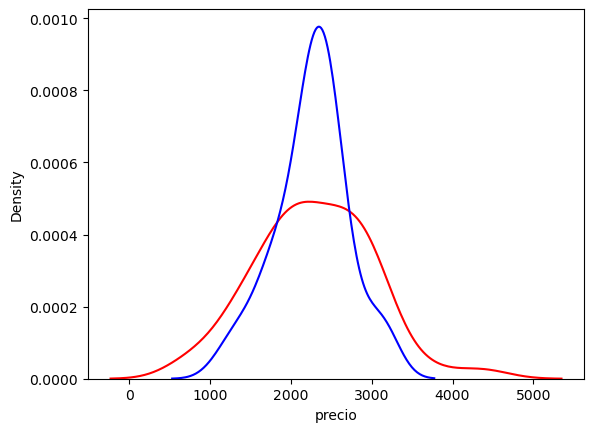

In [13]:
ax1 = sns.kdeplot(y_test, color="r")
sns.kdeplot(prediction, color="b", ax=ax1)

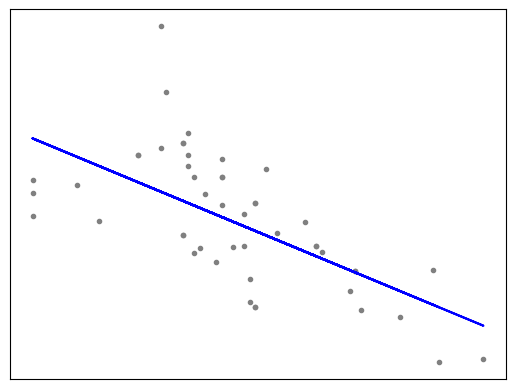

In [14]:
# Visualización de la predicción
plt.scatter(X_test, y_test, color='gray', marker='.')
plt.plot(X_test, prediction, color='blue')
plt.xticks(())
plt.yticks(())
plt.show()